In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("pages/flight_adjusted_dataframe.csv")

In [3]:
df.head()

,date_adjusted,state_from,state_to,date,flight_num,airport_to,airport_from,airline,state_from_name,state_to_name,date_adjusted_index
0,2020/01/01,AK,AK,51,51,51,51,51,51,51,0
1,2020/01/01,AK,AZ,1,1,1,1,1,1,1,0
2,2020/01/01,AK,CA,1,1,1,1,1,1,1,0
3,2020/01/01,AK,CO,2,2,2,2,2,2,2,0
4,2020/01/01,AK,HI,3,3,3,3,3,3,3,0


In [10]:
count_logged_col = []

In [6]:
import numpy as np

In [7]:
def change_func(x):
  return np.log(x + 1)

In [8]:
from tqdm import tqdm

In [11]:
for d in tqdm(df["date_adjusted"].unique()):
	df_sample = df[df["date_adjusted"] == d]
	grouped_df_filtered = df_sample[df_sample["state_from"] != df_sample["state_to"]]
	count_logged = grouped_df_filtered["date"].apply(change_func)
	count_logged_col.extend((count_logged / count_logged.max()).tolist())

100%|██████████| 821/821 [00:39<00:00, 20.66it/s]


In [13]:
df_filtered = df[df["state_from"] != df["state_to"]]

In [14]:
df_filtered["count_logged"] = np.array(count_logged_col)

/Users/nuowenlei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_filtered[["date_adjusted", "date_adjusted_index", "state_from", "state_to", "count_logged"]].to_csv("pages/flight_filtered.csv", index = False)

In [20]:
df_saved = df_filtered[["date_adjusted", "date_adjusted_index", "state_from", "state_to", "count_logged"]]

In [22]:
df_saved_filtered = df_saved[df_saved["date_adjusted_index"] == 10]

In [23]:
import networkx as nx

In [24]:
import matplotlib.pyplot as plt

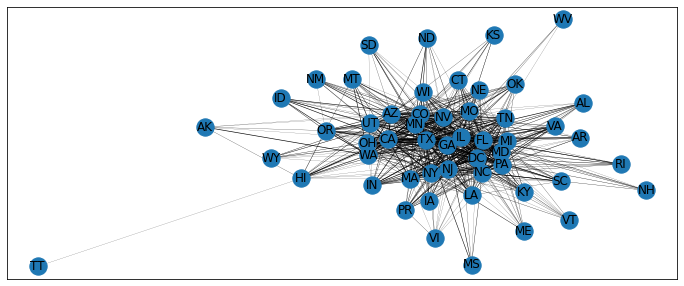

In [25]:
G = nx.from_pandas_edgelist(df_saved_filtered, source = "state_from", target = "state_to", edge_attr = "count_logged")
edge_weights = [i['count_logged'] for i in dict(G.edges).values()]
labels = {i:i for i in dict(G.nodes).keys()}
fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax)
nx.draw_networkx_edges(G, pos, width=edge_weights, ax=ax)
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)

In [27]:
df_saved[["date_adjusted", "date_adjusted_index"]].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [30]:
val = dict((d, i) for i, d in enumerate(df_saved["date_adjusted"].sort_values().unique()))

In [32]:
import json

In [33]:
with open("date_to_index.json", "w") as date_to_index_json:
	json.dump(val, date_to_index_json)